In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
from mlutil.trainer import Trainer
from mlutil.datasets import FashionMNISTSet

In [10]:
class MLPFromScratch(nn.Module):
    def __init__(self, id: int, hd: int, od: int, sigma=0.01) -> None:
        super().__init__()
        
        self.id = id
        
        self.W1 = nn.Parameter(torch.randn(id, hd) * sigma)
        self.b1 = nn.Parameter(torch.zeros(hd))
        self.W2 = nn.Parameter(torch.randn(hd, od) * sigma)
        self.b2 = nn.Parameter(torch.zeros(od))

    def relu(self, x: torch.Tensor) -> torch.Tensor:
        return torch.max(x, torch.zeros_like(x))
    
    def loss(self, yhat, y):
        # Built in softmax capability
        return torch.nn.CrossEntropyLoss()(yhat, y)
    
    def config_optimizer(self, lr):
        self.opt = torch.optim.SGD(self.parameters(), lr=lr)
        
    def train_step(self, batch):
        X, y = batch
        out = self(X)
        loss = self.loss(out, y)
        loss.backward()
        self.opt.step()
        return loss.item()
    
    def val_step(self, batch):
        with torch.no_grad():
            X, y = batch
            out = self(X)
            loss = self.loss(out, y)
            return loss.item()
        
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        X = X.reshape(-1, self.id)
        h = self.relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(h, self.W2) + self.b2

In [13]:
idim = 28
dataset = FashionMNISTSet(dim=(idim,idim), batch_size=256)

model = MLPFromScratch(idim*idim, 256, 10, sigma=0.01)
model.config_optimizer(lr=0.01)

trainer = Trainer(epochs=10)

In [14]:
trainer.train(model, dataset.create_dataloader(train=True), dataset.create_dataloader(train=False))

Epoch: 0, Train Loss: 1.178, Val Loss: 0.684
Epoch: 1, Train Loss: 0.542, Val Loss: 0.538
Epoch: 2, Train Loss: 0.458, Val Loss: 0.483
Epoch: 3, Train Loss: 0.429, Val Loss: 0.455
Epoch: 4, Train Loss: 0.404, Val Loss: 0.500
Epoch: 5, Train Loss: 0.421, Val Loss: 0.560
Epoch: 6, Train Loss: 0.471, Val Loss: 0.558
Epoch: 7, Train Loss: 0.468, Val Loss: 0.532
Epoch: 8, Train Loss: 0.417, Val Loss: 0.465
Epoch: 9, Train Loss: 0.416, Val Loss: 0.514


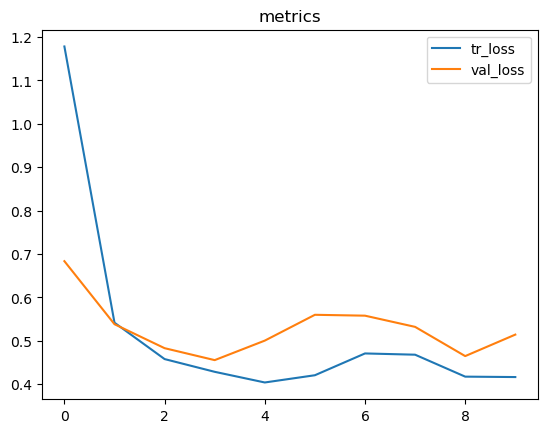

In [16]:
trainer.plot()